In [96]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [97]:
file_path_C = r"C:\Users\marcu\OneDrive\Documents\GitHub\EM2_lab\EM2-LAB-1-1-C\EM2-LAB-1-1-C_01.csv"

data_1_C = pd.read_csv(file_path_C, sep=',', decimal='.', header=1)

# Update column names
data_1_C.columns = ['Time (ms)', 'Channel A (V)', 'Channel B (V)']

# Convert data to float
data_1_C = data_1_C.astype(float)

data_1_C.head()


,Time (ms),Channel A (V),Channel B (V)
0,-490.204602,2.460097,0.000000
1,-490.194362,2.460097,0.000000
2,-490.184122,2.460097,0.000000
3,-490.173882,2.460097,0.158696
4,-490.163642,2.460097,0.158696


In [98]:
file_path_R = r"C:\Users\marcu\OneDrive\Documents\GitHub\EM2_lab\EM2-LAB-1-1-R\EM2-LAB-1-1_01.csv"

data_1_R = pd.read_csv(file_path_R, sep=',', decimal='.', header=1)

# Update column names
data_1_R.columns = ['Time (ms)', 'Channel A (V)', 'Channel B (V)']

# Convert data to float
data_1_R = data_1_R.astype(float)

data_1_R.head()

# Find the index where the time is closest to 0
index_0_C = (np.abs(data_1_C['Time (ms)'])).idxmin()
index_0_R = (np.abs(data_1_R['Time (ms)'])).idxmin()

# Relevant values
R = 10*10**3 # Ohm
C = 47*10**(-9) # F

# Calculate the time constant
tau = R*C


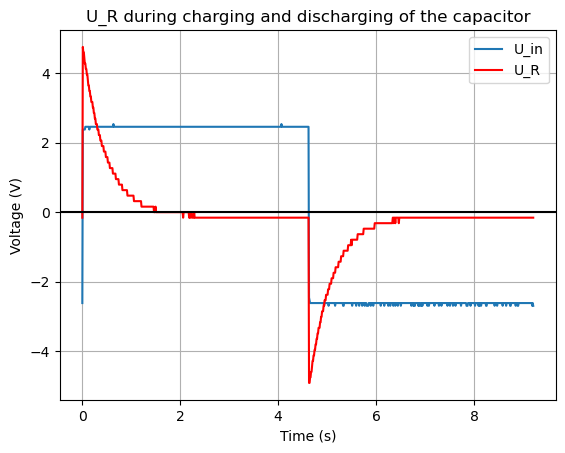

In [99]:
# Plot the first couple of data points from channel A and B
data_1_R_to_plot = data_1_R.iloc[index_0_R:index_0_R + 900]

plt.figure()
plt.plot(data_1_R_to_plot['Time (ms)'], data_1_R_to_plot['Channel A (V)'], label='U_in')
plt.plot(data_1_R_to_plot['Time (ms)'], data_1_R_to_plot['Channel B (V)'], color="red", label='U_R')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

# Add grid
plt.grid(True)

# Add line at y = 0
plt.axhline(y=0, color='k')

plt.title("U_R during charging and discharging of the capacitor") 

plt.legend(loc='upper right')
plt.show()



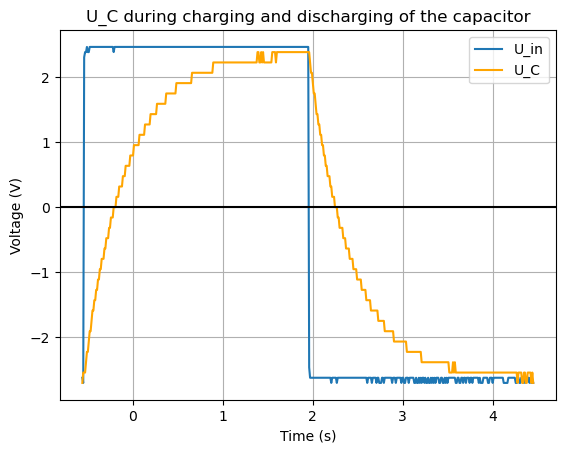

In [100]:

# Plot the first couple of data points from channel A and B

data_1_C_to_plot = data_1_C.iloc[index_0_C - 55:index_0_C + 435]

plt.figure()
plt.plot(data_1_C_to_plot['Time (ms)'], data_1_C_to_plot['Channel A (V)'], label='U_in')
plt.plot(data_1_C_to_plot['Time (ms)'], data_1_C_to_plot['Channel B (V)'], color="orange", label='U_C')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

# Add grid
plt.grid(True)

# Add line at y = 0
plt.axhline(y=0, color='k')

plt.title("U_C during charging and discharging of the capacitor")

plt.legend(loc='upper right')
plt.show()



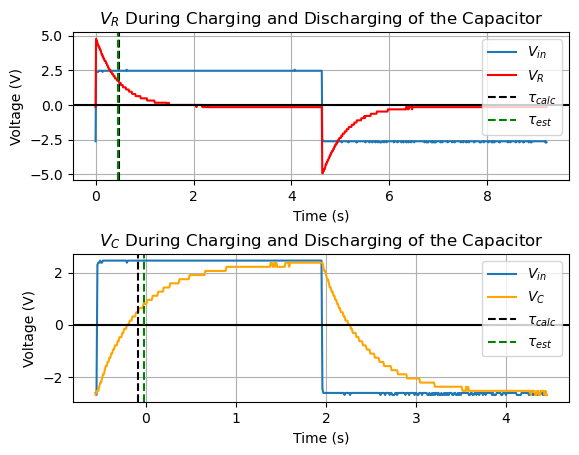

In [101]:
# U_C
index_0_C -= 55

data_1_C_to_plot = data_1_C.iloc[index_0_C:index_0_C + 435 + 55]
data_1_C_tau_est = data_1_C.iloc[index_0_C:index_0_C + 190 + 55]

# U_R
data_1_R_to_plot = data_1_R.iloc[index_0_R:index_0_R + 900]
data_1_R_tau_est = data_1_R.iloc[index_0_R + 10:index_0_R + 450]

# Estimate time constant for U_C by finding the index where the voltage is closest to 0.63*V_max
# index_tau_C = (np.abs(data_1_C_tau_est['Channel B (V)'] - 0.63*data_1_C_tau_est['Channel B (V)'].max())).idxmin()
min_val = data_1_C_tau_est['Channel B (V)'].min()
max_val = data_1_C_tau_est['Channel B (V)'].max()

index = np.where(data_1_C_tau_est['Channel B (V)'] > 0.66*abs(max_val - min_val) + min_val)[0][0]
index_tau_C = index_0_C + index


# Estimate time constant for U_R by finding the index where the voltage is closest to 0.37*V_max
# index_tau_R = (np.abs(data_1_R_tau_est['Channel B (V)'] - 0.37*data_1_R_tau_est['Channel B (V)'].max())).idxmin()
min_val = data_1_R_tau_est['Channel B (V)'].min()
max_val = data_1_R_tau_est['Channel B (V)'].max()

index = np.where(data_1_R_tau_est['Channel B (V)'] < 0.33*max_val)[0][0]
index_tau_R = index_0_R + index


# Plot the two previous plots in one figure using subplots
fig, axs = plt.subplots(2)

axs[0].plot(data_1_R_to_plot['Time (ms)'], data_1_R_to_plot['Channel A (V)'], label='$V_{in}$')
axs[0].plot(data_1_R_to_plot['Time (ms)'], data_1_R_to_plot['Channel B (V)'], color="red", label='$V_R$')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Voltage (V)')
axs[0].grid(True)
axs[0].axhline(y=0, color='k')
axs[0].set_title("$V_R$ During Charging and Discharging of the Capacitor")

# Draw a line at the time constant
axs[0].axvline(x=(data_1_R_to_plot['Time (ms)'][index_0_R] + tau*1000), color='black', linestyle='--', label=r'$\tau_{calc}$')
axs[0].axvline(x=(data_1_R_to_plot['Time (ms)'][index_tau_R]), color='green', linestyle='--', label=r'$\tau_{est}$')

axs[0].legend(loc='upper right')

axs[1].plot(data_1_C_to_plot['Time (ms)'], data_1_C_to_plot['Channel A (V)'], label='$V_{in}$')
axs[1].plot(data_1_C_to_plot['Time (ms)'], data_1_C_to_plot['Channel B (V)'], color="orange", label='$V_C$')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Voltage (V)')
axs[1].grid(True)
axs[1].axhline(y=0, color='k')
axs[1].set_title("$V_C$ During Charging and Discharging of the Capacitor")

# Draw a line at the time constant
axs[1].axvline(x=(data_1_C_to_plot['Time (ms)'][index_0_C] + tau*1000), color='black', linestyle='--', label=r'$\tau_{calc}$')
axs[1].axvline(x=(data_1_C_to_plot['Time (ms)'][index_tau_C]), color='green', linestyle='--', label=r'$\tau_{est}$')

axs[1].legend(loc='upper right')

plt.subplots_adjust(hspace=0.5)


In [102]:
print(f"The calculated time constant is {round(tau*1000, 2)} ms")

print(f"The estimated time constant for U_R is {round(data_1_R_to_plot['Time (ms)'][index_tau_R] - data_1_R_to_plot['Time (ms)'][index_0_R], 2)} ms")
print(f"The estimated time constant for U_C is {round(data_1_C_to_plot['Time (ms)'][index_tau_C] - data_1_C_to_plot['Time (ms)'][index_0_C], 5)} ms")

The calculated time constant is 0.47 ms
The estimated time constant for U_R is 0.46 ms
The estimated time constant for U_C is 0.53248 ms
